# Lorenz equations

$\dot x = \sigma (y-x)$

$\dot y = rx -y-xz$

$\dot z =xy -bz $

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D



In [4]:
#define flow

def flow(y, t, sigma, r, b):
    dx = sigma * ( y[1] - y[0] )
    dy = r*y[0] - y[1] - y[0]*y[2]    
    dz = y[0]*y[1] - b*y[2]
    return [dx, dy, dz]

### plot trajectory


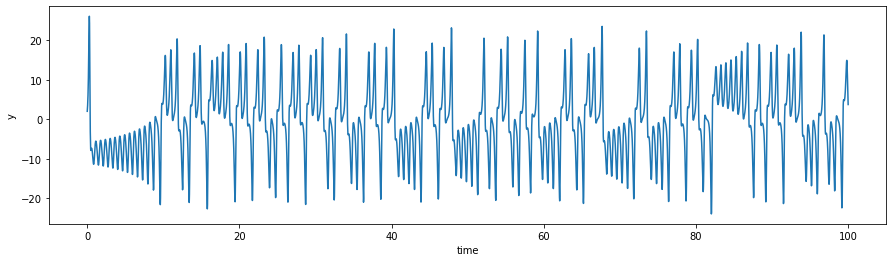

In [82]:
sigma = 10; b = 8/3; 
r = 28
# try r=0.5; 2; 20; 24; 28

t = np.linspace(0,100,4000)
y0 = (1, 2, 3)

y = odeint(flow, y0, t, args=(sigma, r , b))

plt.figure(figsize=(15,4))
plt.plot(t, y[:,1])
plt.xlabel("time")
plt.ylabel("y");
#plt.axes().set_aspect(0.2)



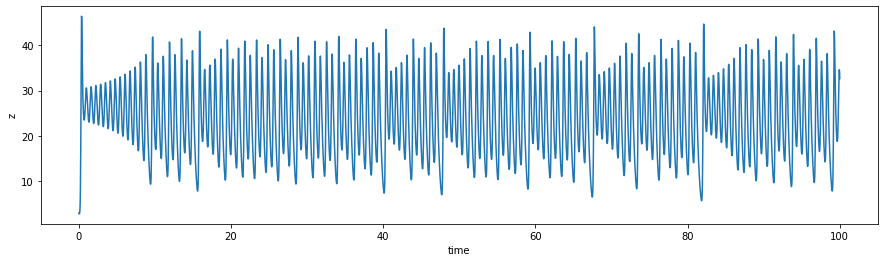

In [83]:
plt.figure(figsize=(15,4))
plt.plot(t, y[:,2])
plt.xlabel("time")
plt.ylabel("z");

## Plot in phase space: Lorenz attractor

#### projection to x - z plane

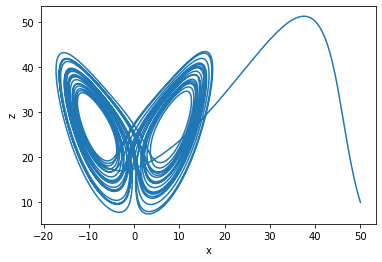

In [84]:
sigma = 10; b = 2.66666667; r = 28
# try r = 0.5; 2; 20; 24 ; 28; 40

t = np.linspace(0,30,20000) # use ending time 3...30
y0 = (50, 20, 10)

y = odeint(flow, y0, t, args=(sigma, r , b))

plt.plot(y[:,0], y[:,2])
plt.xlabel("x")
plt.ylabel("z");

#### 3d plot 

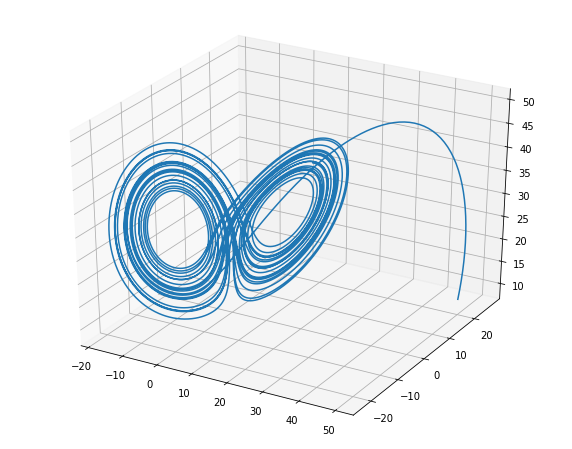

In [85]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

ax.plot(y[:,0], y[:,1], y[:,2], label='Lorenz attractor')
#ax.legend()

plt.show()

### Sensitivity to initial conditions


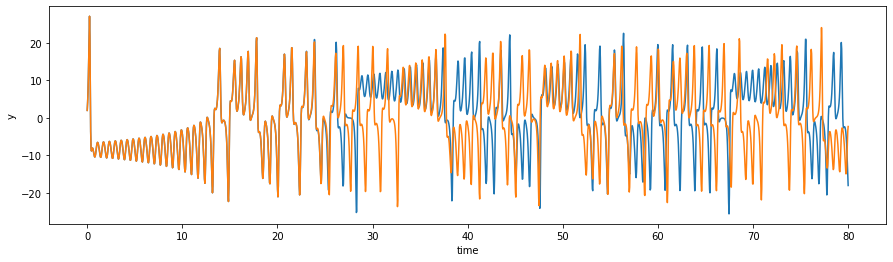

In [86]:
sigma = 10; b = 2.66666667; r = 28
# try r= 28 with y0=(2,2,1) and (2.01, 2.01,1.01)

t = np.linspace(0,80,2000)


y0 = (2, 2, 1)
y = odeint(flow, y0, t, args=(sigma, r , b))

y0b = (2.0000001, 2.0000001, 1)
y1 = odeint(flow, y0b, t, args=(sigma, r , b))


plt.figure(figsize=(15,4))
plt.plot(t, y[:,1])
plt.plot(t, y1[:,1])
plt.xlabel("time")
plt.ylabel("y");

now plot difference between the two initial conditions as function of time:

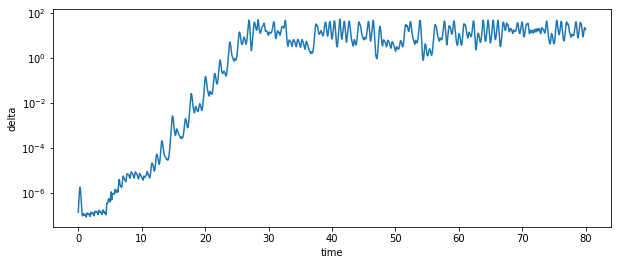

In [87]:
yy=y-y1
delta = np.linalg.norm(y-y1, axis=1)

plt.figure(figsize=(10,4))
plt.plot(t, delta[:])
plt.yscale('log')
plt.xlabel("time")
plt.ylabel("delta");

## Lorenz map

find the local maxima $z_n$ of the variable z and plot $z_{n+1}$ as a "function" of $z_n$ ("function" in quotation marks as there is no guarantee that this is indeed a uniquely defined function, in fact it turns out to be approximately one, but not exactly)

In [56]:
def find_maxima(ser):
  # find local maxima in time series
  ds = ser[1:] - ser[:-1] #difference between subsequent elements
  max0 = ser[1:][np.where( (ds[:-1] > 0.) & (ds[1:] < 0.) ) ]
  
  # we should improve maxima by interpolation

  return max0


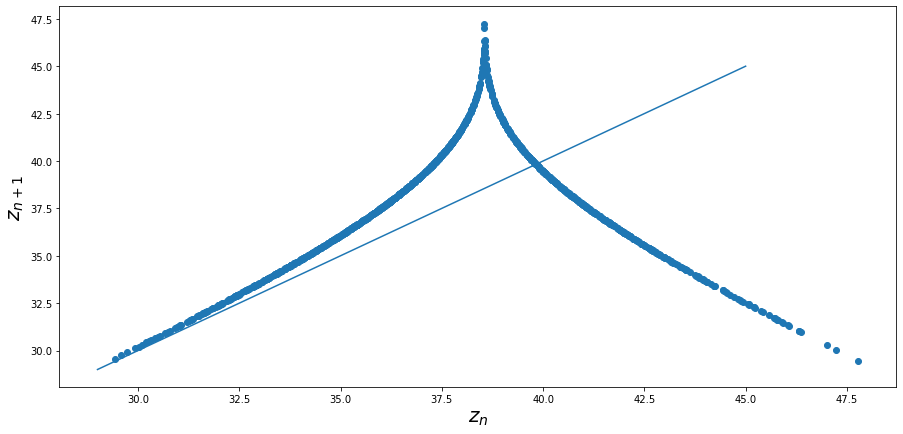

In [57]:
sigma = 10; b = 2.66666667; r = 28
# try r=0.5; 2; 20; 24; 28

t = np.linspace(0,1000,400000)
y0 = (2, 2, 1)

y = odeint(flow, y0, t, args=(sigma, r , b))

maxima = find_maxima(y[:,2])

plt.figure(figsize=(15,7))
plt.scatter(maxima[:-1], maxima[1:])
plt.xlabel("$z_n$", fontsize=20)
plt.ylabel("$z_{n+1}$", fontsize=20);
plt.plot(np.array([29,45]),np.array([29,45]) );
#plt.plot(np.array([29,48]),np.array([29,29]) );



In [ ]:
a = np.array([1., 2, 4, 5. ,3.,2,4,6,3])
#a[np.where(a<5)]
find_maxima(a)

In [ ]:
plt.scatter(-(maxima[:-1]-38.55)+38.55, maxima[1:])

